<a href="https://colab.research.google.com/github/asrafulasf72/Data-Mining-Algorithm/blob/main/adaboost_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

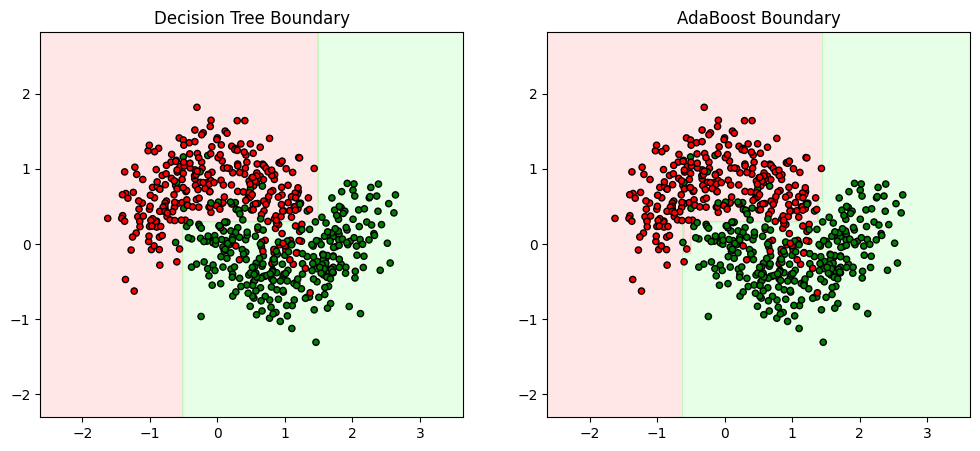

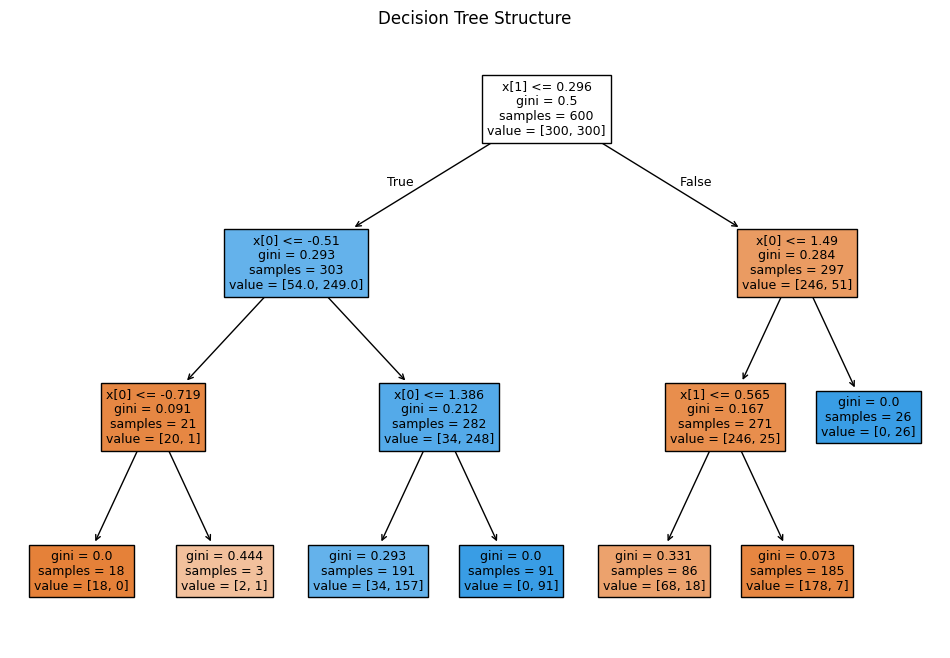

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap

# Create complex nonlinear dataset
X, y = make_moons(n_samples=600, noise=0.30, random_state=42)

# Models
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=80,
    learning_rate=1.0,
    random_state=0
)

dt.fit(X, y)
ada.fit(X, y)

# Plot function
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_dark = ListedColormap(['#FF0000', '#008000'])

    ax.contourf(xx, yy, Z, alpha=0.35, cmap=cmap_light)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_dark, edgecolor='k', s=20)
    ax.set_title(title)

# Plot decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(dt, X, y, ax[0], "Decision Tree Boundary")
plot_decision_boundary(ada, X, y, ax[1], "AdaBoost Boundary")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True)
plt.title("Decision Tree Structure")
plt.show()
